In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from Functions.FunctionsDataVisualization import plotConfusionMatrix, savefig, snsConfusionMatrix, distOutputLayer, plotLOFARgram
from lps_toolbox.metrics.classification import sp_index
from sklearn.metrics import recall_score,confusion_matrix

import pickle

from sklearn.preprocessing import LabelEncoder

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    import md5, sha

path_classif = os.environ['CLASSIFICATION_RESULTS']
path_figures_classif = os.environ['CLASSIFICATION_FIGURES']
path_figures_classif

Using TensorFlow backend.


'/home/venancio/Workspace/SonarAnalysis/Results/Classification/Figures'

In [2]:
database = '24classes'
qtd_class = database[:2]

In [3]:
if database=='31classes':
    query_analyse = 'database==\'31classes\' & n_inits==10 & type_arq==\'MLP\' & PCD==False & batch_size==64 & n_neurons==200'
if database=='24classes':
    query_analyse = 'database==\'24classes\' & n_inits==10 & type_arq==\'MLP\' & PCD==False & batch_size==512 & n_neurons==150'
        
files = {}
files_fold = {}
eff_ech_class = {}
# file_hier = path_classif + '/Hierarq_{0}_{1}_inits_{2}_folds_{3}_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{4}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss'.format(
#                 database,init,folds,neurons,batch)

df_bd_all = pd.read_csv(path_classif+'/bd.csv')
df_bd = df_bd_all.query(query_analyse)
print df_bd.drop(['hash','path'],axis=1)
path_result = df_bd.path.values[0]


file_hier = path_result
tese_goltz = path_figures_classif + '/{0}'.format(df_bd.hash.values[0])
# neurons_hierarqNet = []
# for ineuron in range_neurons:
#     path = path_classif + '/Hierarq_{0}_{1}_inits_{2}_folds_{3}_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{4}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss'.format(
#                 database,init,folds,ineuron,batch)
    
#     neurons_hierarqNet.append(path)



# tese_goltz = path_figures_classif +  '/Hierarq_{0}_{1}_inits_{2}_folds_{3}_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_{4}_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss'.format(
#                 database,init,folds,neurons,batch)

    
if not os.path.exists(tese_goltz):
    os.mkdir(tese_goltz)

     PCD   analysis_name  batch_size   database    dev hidden_activation  \
8  False  Classification         512  24classes  False              tanh   

                 loss metrics  n_epochs  n_folds  n_inits  n_neurons  \
8  mean_squared_error  acc,sp      1000       10       10        150   

  observation optmizerAlgorithm output_activation type_arq version  weight  
8         NaN              adam              tanh      MLP     NaN    True  


# Dataset

In [4]:
# Load all Data

#Function for Dataset
from Functions.dataset.shipClasses import LoadData
import numpy as np

dt_lofar_power = LoadData(database=database)
dt_lofar_power.infoData()
all_data,all_trgt= dt_lofar_power.getData()

/home/venancio/Workspace/SonarAnalysis/Results/24classes/lofar_data_file_fft_1024_decimation_3_spectrum_left_400.jbl
[+] Time to read data file: 2.75095295906 seconds
analysis of Class01: 
size: 3209x400 -- maxValue: 1.38463282277 -- minValue: -0.199999448771
analysis of Class02: 
size: 3037x400 -- maxValue: 1.34259549045 -- minValue: -0.199998892824
analysis of Class03: 
size: 3212x400 -- maxValue: 1.49508318988 -- minValue: -0.199998792195
analysis of Class04: 
size: 3203x400 -- maxValue: 1.38544304863 -- minValue: -0.199999766141
analysis of Class05: 
size: 4781x400 -- maxValue: 2.08462558961 -- minValue: -0.199999495607
analysis of Class06: 
size: 2232x400 -- maxValue: 1.03378591259 -- minValue: -0.199999021577
analysis of Class07: 
size: 10821x400 -- maxValue: 1.70564969417 -- minValue: -0.199999701918
analysis of Class08: 
size: 5898x400 -- maxValue: 2.29338655988 -- minValue: -0.199999534352
analysis of Class09: 
size: 14562x400 -- maxValue: 2.27570297485 -- minValue: -0.1999993

In [5]:
path_result

'/home/venancio/Workspace/SonarAnalysis/Results/Classification/304eba95bedd3db814476e5d08bdcc0e31089ef9706c759678f251df50a5a908'

In [6]:
import sklearn
from sklearn.preprocessing import StandardScaler

all_data = StandardScaler().fit_transform(all_data)


In [7]:
ifold = 0
table_master = pd.read_csv(path_result +'/fold0{0}'.format(ifold)+'/master_table.csv')
df_pred = pd.read_csv(path_result +'/fold0{0}'.format(ifold)+ '/predict.csv')

In [8]:
class_analysis = [13]
resolution = 2000
class_analysis_1 = map(lambda x:x-1, class_analysis)[0]
ids_train = table_master[(table_master['fold_0']==0)&(table_master['target']==class_analysis_1)].index.values
ids_test = table_master[(table_master['fold_0']==1)&(table_master['target']==class_analysis_1)].index.values

In [9]:
values = np.argmax(df_pred.values,axis=1)
table_master['pred'] = values
ids_c0_f0_p1t = table_master[(table_master['target']==class_analysis_1)&(table_master['fold_0']==0)&(table_master['target']==table_master['pred'])].index.values
ids_c0_f0_p2t = table_master[(table_master['target']==class_analysis_1)&(table_master['fold_0']==0)&(table_master['target']!=table_master['pred'])].index.values

ids_c0_f1_p1t = table_master[(table_master['target']==class_analysis_1)&(table_master['fold_0']==1)&(table_master['target']==table_master['pred'])].index.values
ids_c0_f1_p2t = table_master[(table_master['target']==class_analysis_1)&(table_master['fold_0']==1)&(table_master['target']!=table_master['pred'])].index.values

In [ ]:
class_analysis = [13]#[8,9,13,21,23] pode - ( 8, 9, 13,)
eff_ = [0.64, 0.69, 0.57, 0.55]
resolution = 2000
class_analysis_1 = map(lambda x:x-1, class_analysis)
for iclass, iff in zip(class_analysis_1,eff_):
    ids_train = table_master[(table_master['fold_0']==0)&(table_master['target']==iclass)].index.values
    ids_test = table_master[(table_master['fold_0']==1)&(table_master['target']==iclass)].index.values

    values = np.argmax(df_pred.values,axis=1)
    table_master['pred'] = values
    ids_c0_f0_p1t = table_master[(table_master['target']==iclass)&(table_master['fold_0']==0)&(table_master['target']==table_master['pred'])].index.values
    ids_c0_f0_p2t = table_master[(table_master['target']==iclass)&(table_master['fold_0']==0)&(table_master['target']!=table_master['pred'])].index.values

    ids_c0_f1_p1t = table_master[(table_master['target']==iclass)&(table_master['fold_0']==1)&(table_master['target']==table_master['pred'])].index.values
    ids_c0_f1_p2t = table_master[(table_master['target']==iclass)&(table_master['fold_0']==1)&(table_master['target']!=table_master['pred'])].index.values


    fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(25, 10))

    print("Class {}: {}".format(iclass,iff))
    iax = ax.flatten()
    
    sns.heatmap(all_data[ids_train],ax=iax[0],cmap='jet')
    iax[0].set_title("train data class {0}".format(iclass+1))
    sns.heatmap(all_data[ids_c0_f0_p1t],ax=iax[1],cmap='jet')
    iax[1].set_title("train predict data true positive class {0}".format(iclass+1))
    sns.heatmap(all_data[ids_c0_f0_p2t],ax=iax[2],cmap='jet')
    iax[2].set_title("train predict data false positive class {0}".format(iclass+1))

    sns.heatmap(all_data[ids_test],ax=iax[3],cmap='jet')
    iax[3].set_title("test data  class {0}".format(iclass+1))
    sns.heatmap(all_data[ids_c0_f1_p1t],ax=iax[4],cmap='jet')
    iax[4].set_title("test predict data true positive class {0}".format(iclass+1))
    sns.heatmap(all_data[ids_c0_f1_p2t],ax=iax[5],cmap='jet')
    iax[5].set_title("test predict data false positive class {0}".format(iclass+1))





In [ ]:
sns.heatmap(np.clip(all_data[ids_train],-10,-), cmap='jet')
ids_test = table_master[(table_master['fold_0']==1)&(table_master['target']==class_analysis_1)].index.values



In [ ]:
fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(25, 10))

print ax
sns.heatmap(all_data[ids_test],ax=ax[0],cmap='jet')
ax[0].set_title("test data  class {0}".format(class_analysis_1+1))
sns.heatmap(all_data[ids_c0_f1_p1t],ax=ax[1],cmap='jet')
ax[1].set_title("test predict data true positive class {0}".format(class_analysis_1+1))
sns.heatmap(all_data[ids_c0_f1_p2t],ax=ax[2],cmap='jet')
ax[2].set_title("test predict data false positive class {0}".format(class_analysis_1+1))

In [16]:
data = table_master[(table_master['target']==12)&(table_master['fold_0']==1)].index.values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0f86c5f50>]],
      dtype=object)

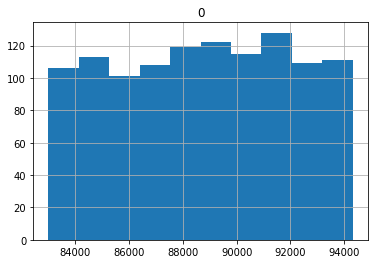

In [17]:
pd.DataFrame(data).hist()

In [24]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

iris = sns.load_dataset("iris")

le = LabelEncoder()
all_trgt = le.fit_transform(iris.species.values)
all_data = iris[iris.columns[:-1]].values

In [26]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
y